In [5]:

####################################################################################
#importing the libraries needed
####################################################################################
import os
import re
import cv2
import tempfile
import pytesseract
import numpy as np 
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from pdf2image import convert_from_path
from matplotlib.patches import Rectangle
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,PDFPageCountError,PDFSyntaxError)

In [108]:

####################################################################################
#importing the files using OS 
####################################################################################
from os import path
train = path.join(r'C:\Users\user\Desktop\bill\Train')
train_img = path.join(r'C:\Users\user\Desktop\bill\Train_img')

test = path.join(r'C:\Users\user\Desktop\bill\Test')
test_img = path.join(r'C:\Users\user\Desktop\bill\Test_img')


In [143]:

####################################################################################
#adding the address of all the file names giving the total address to all the files.
####################################################################################
train_name = os.listdir(train)
print(train_name[:10])

test_name = os.listdir(test)
print(test_name[:10])

next_train_add = [os.path.join(train, fname) 
                for fname in train_name]
next_test_add = [os.path.join(test, fname) 
                for fname in test_name]


run=path.join(r'C:\Users\user\Desktop\bill\run')
temp=os.listdir(run)
run_path=[os.path.join(run, fname) 
                for fname in temp]
print(run_path)

print("=============================================")
#print(next_train_add)
#print(next_test_add)


['.ipynb_checkpoints', 'TR_1.pdf', 'TR_10.pdf', 'TR_100.pdf', 'TR_101.pdf', 'TR_102.pdf', 'TR_103.pdf', 'TR_104.pdf', 'TR_105.pdf', 'TR_106.pdf']
['TE_131.pdf', 'TE_132.pdf', 'TE_133.pdf', 'TE_134.pdf', 'TE_135.pdf', 'TE_136.pdf', 'TE_137.pdf', 'TE_138.pdf', 'TE_139.pdf', 'TE_140.pdf']
['C:\\Users\\user\\Desktop\\bill\\run\\pre.png', 'C:\\Users\\user\\Desktop\\bill\\run\\TE_154.png']


In [50]:
####################################################################################
#converting the image from PDF to PNG
####################################################################################

save_dir_1 = r'C:\Users\user\Desktop\Bill\Test_img'
save_dir_2 = r'C:\Users\user\Desktop\Bill\Train_img'
#######################
#Test images conversion
#######################
for i,img_path in enumerate(next_test_add):
    
    images = convert_from_path(img_path)    

    for k, image in enumerate(images):
        ftemp=((os.path.basename(img_path))[:-4])
    
        fname = ftemp+'.png'
        image.save(path.join(save_dir_1, fname),dpi=(400,400))
# #######################
# #Test images conversion
# #######################
for i,img_path in enumerate(next_train_add):
    
    images = convert_from_path(img_path)

    for k, image in enumerate(images):
        ftemp=((os.path.basename(img_path))[:-4])
        fname = ftemp+'.png'
        image.save(path.join(save_dir_2, fname),dpi=(400,400))
        
    

    


In [131]:

####################################################################################
#pre_processing functions to help OCR work better
####################################################################################

IMAGE_SIZE = 1800
BINARY_THREHOLD = 180

def process_image_for_ocr(file_path):
    # TODO : Implement using opencv
    #temp_filename = set_image_dpi(file_path)
    im_new = remove_noise_and_smooth(file_path)
    #cv2.imshow('preprocess', im_new)
    return im_new


def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = max(1, int(IMAGE_SIZE / length_x))
    size = factor * length_x, factor * width_y
    # size = (1800, 1800)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(400, 400))
    return temp_filename

def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3

def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,
                                     3)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image




In [3]:

####################################################################################
#importing the files using OS 
####################################################################################
def binarisation(pth):
    img = cv2.imread(pth,0)  
    #img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
    img = cv2.medianBlur(img,5)
    
    ret,thresh0 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    
    thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                              cv2.THRESH_BINARY, 11, 2) 

    thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                              cv2.THRESH_BINARY, 11, 2) 
    titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    
    images = [img, thresh0, thresh1, thresh2]

#     for i in range(4):
#         plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
#         plt.title(titles[i])
#         plt.xticks([]),plt.yticks([])

    return thresh2
    



In [9]:
def text_extraction(text_list,pth):
    list2=[]
   
    if(text_list[0]==''):
        fname=pth
        img=binarisation(fname)
        text_list[i]=pytesseract.image_to_string(img)
        list2.append(text_list[i])
    list2=[]
    for i in text_list:
      list2.append(i.split('\n'))
    print(list2)
    for i in list2:
      j=0
      while j<len(i):
          result1=re.search(r"subtotal", i[j].lower())
          result2=re.search(r"total", i[j].lower())
          result3=re.search(r"amount", i[j].lower())
          result4=re.search(r"cash", i[j].lower())
          if result1==None and result2==None and result3==None:
            i.pop(j)
          else:
            j=j+1
          print(result1,result2,result3,result4)
          print("list2========",list2)
    total=[]
    for i in range(len(list2)):
      floats=[]
      for j in range(len(list2[i])):
        result=re.findall("\d+\.\d+",list2[i][j])     #This searches all the floating values in the string containg total,subtotal and amount 
        if len(result)>0:
          floats.append(float(result[0]))
      if len(floats)==0:
        total.append(0)
      else:
        total.append(max(floats))               #Appending the maximum float value present for each image since total amount is the sum of prices of all the items
    
    if(len(total)>0):
        return(max(total))
    else:
        return("sorry unable to fetch")



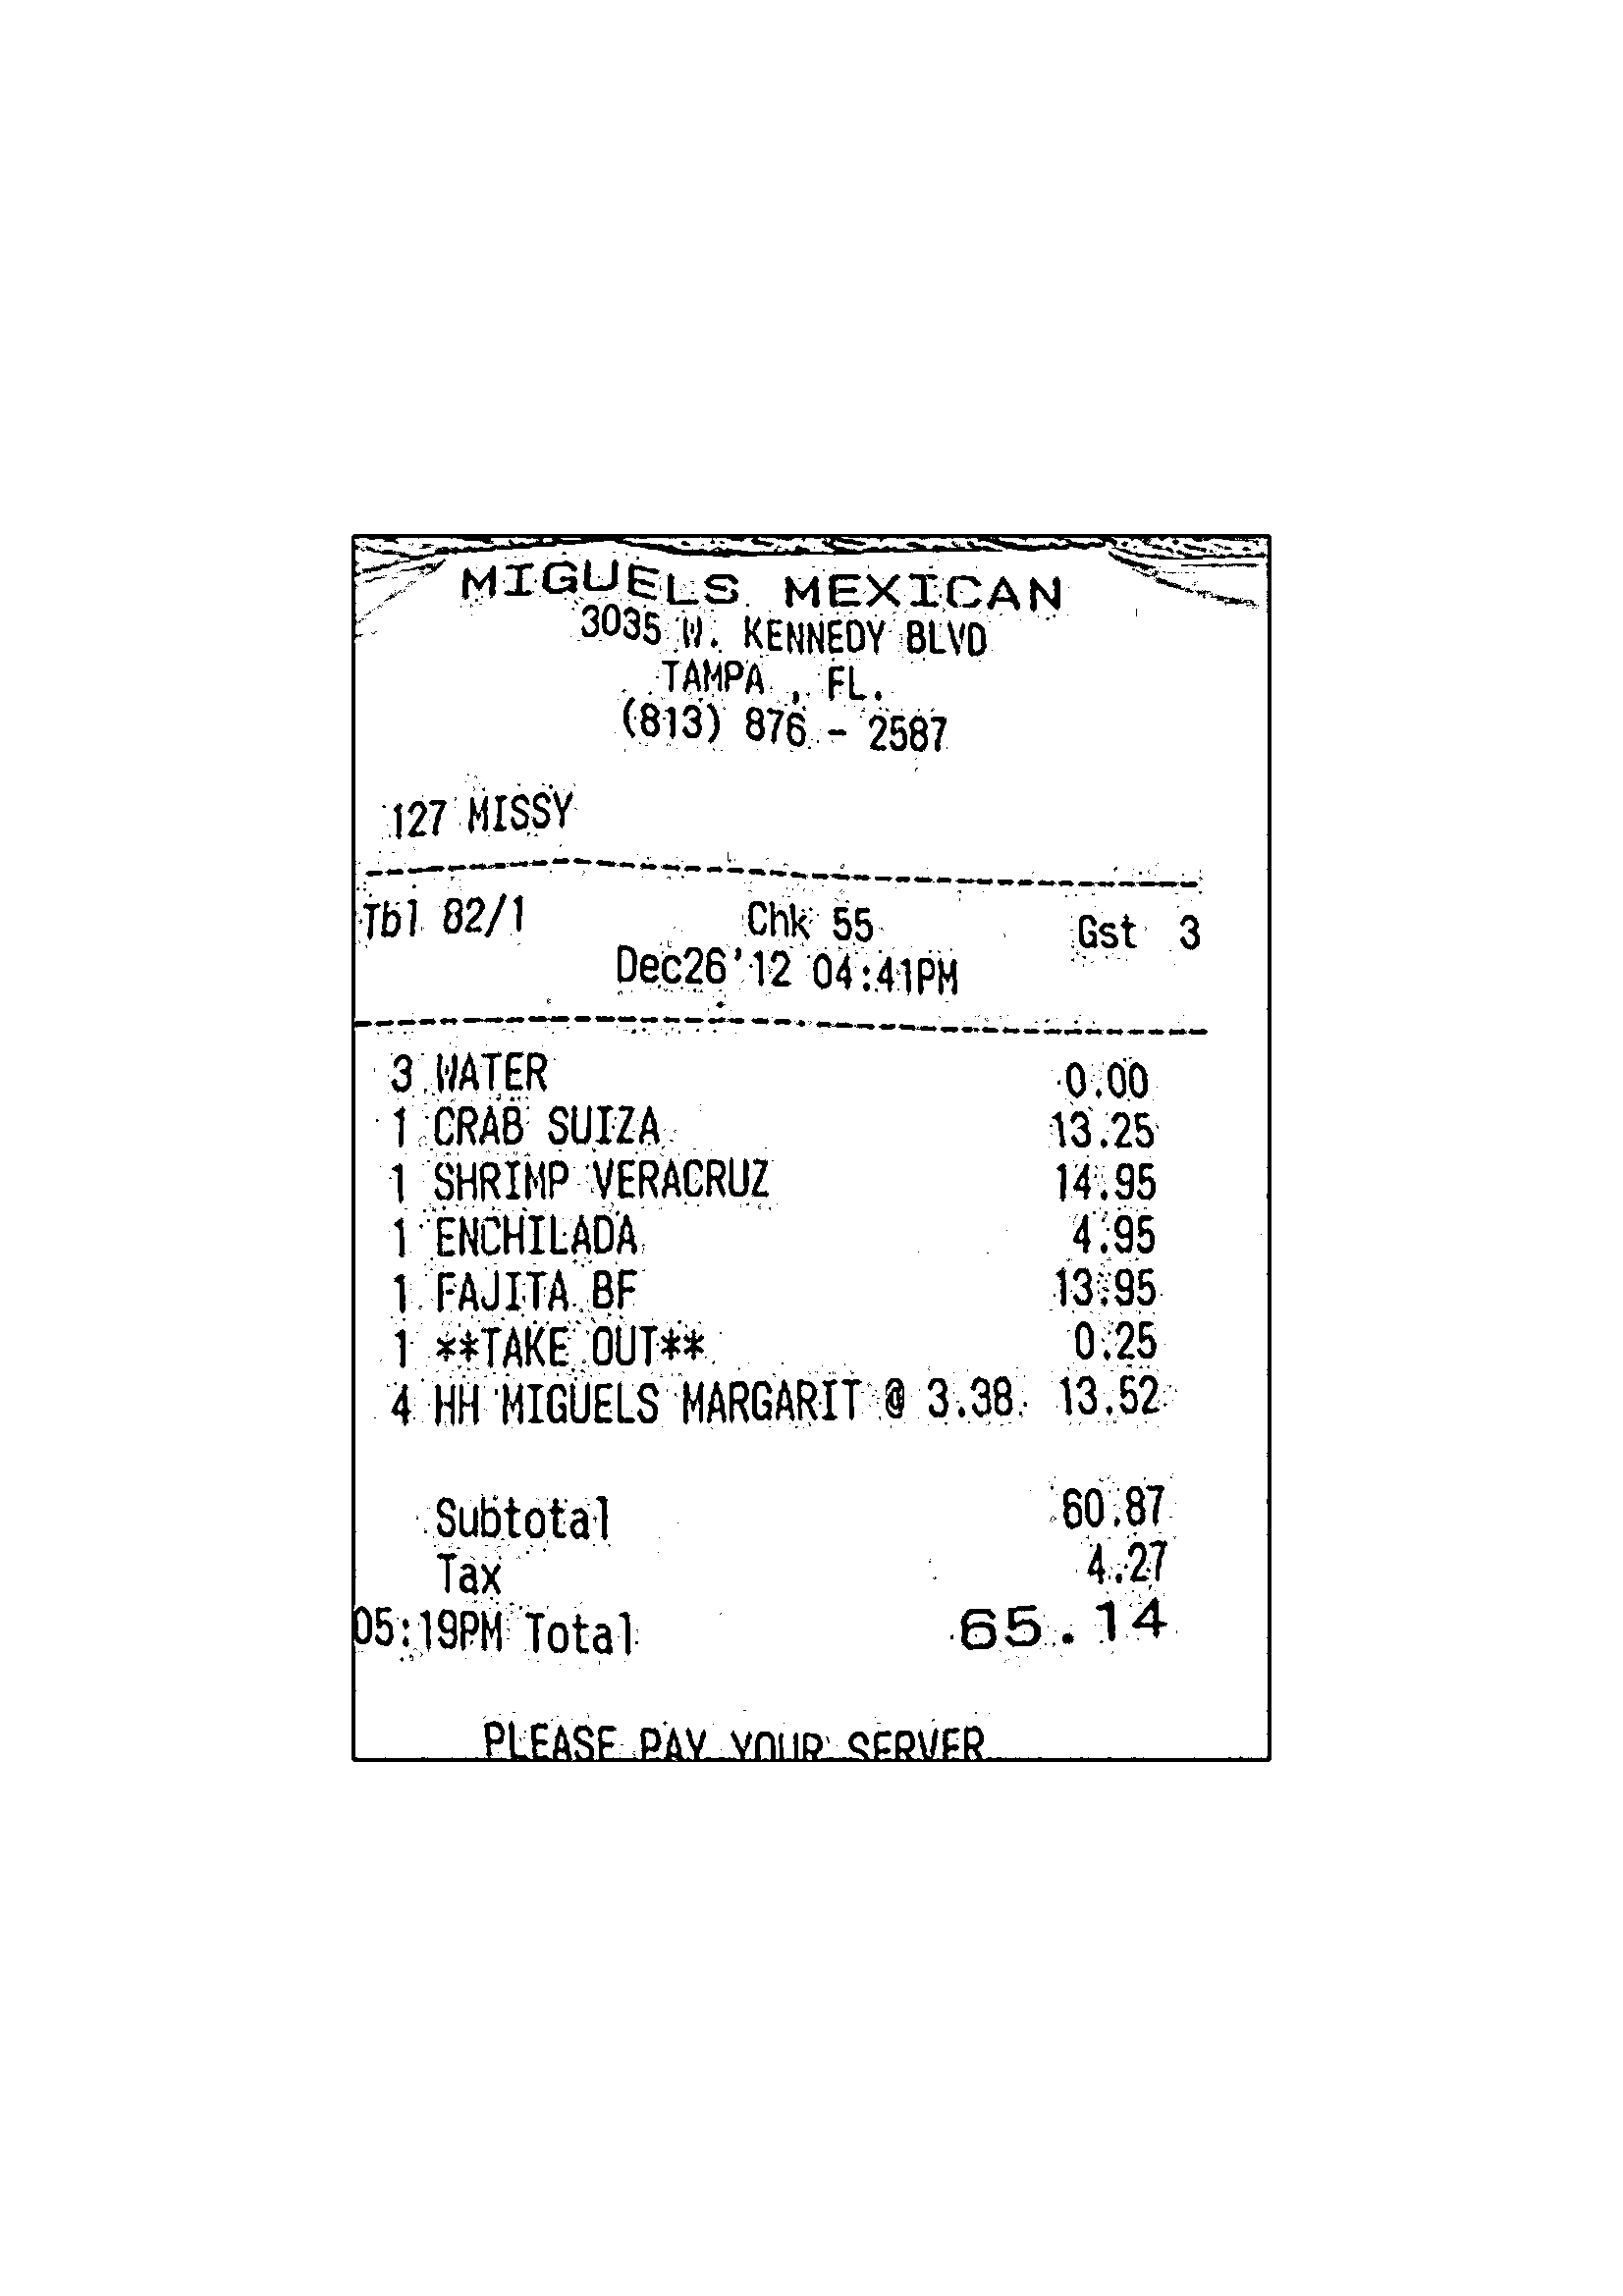

[['=" MEGUELS MEXICAN “—', '“ 9035. KENNEDY BLVD oe', '_ TAMPA. FL', '(813) 876. - 2567', '“27 MISSY', 'jolt ea', "— deb2e'12 ofa =", 'QWATER 00', '{CRAB SUIZA. 13.25', '1 SHRIMP VERACRUZ 14.95', '1 ENCHILADA, 4:95', '1. FAJITA.BF 13:95.', 'TATAKE OUT 0.25', "4 HH MIGUELS MARGARIT'@ 3.98. 13.2:", 'Subtotal 60,87,', 'Tax AT', '05:19PM Total 65.14']]
None None None None
list2======== [['“ 9035. KENNEDY BLVD oe', '_ TAMPA. FL', '(813) 876. - 2567', '“27 MISSY', 'jolt ea', "— deb2e'12 ofa =", 'QWATER 00', '{CRAB SUIZA. 13.25', '1 SHRIMP VERACRUZ 14.95', '1 ENCHILADA, 4:95', '1. FAJITA.BF 13:95.', 'TATAKE OUT 0.25', "4 HH MIGUELS MARGARIT'@ 3.98. 13.2:", 'Subtotal 60,87,', 'Tax AT', '05:19PM Total 65.14']]
None None None None
list2======== [['_ TAMPA. FL', '(813) 876. - 2567', '“27 MISSY', 'jolt ea', "— deb2e'12 ofa =", 'QWATER 00', '{CRAB SUIZA. 13.25', '1 SHRIMP VERACRUZ 14.95', '1 ENCHILADA, 4:95', '1. FAJITA.BF 13:95.', 'TATAKE OUT 0.25', "4 HH MIGUELS MARGARIT'@ 3.98. 13.2:", 'Subtotal

In [10]:

run_path=r'C:\Users\user\Desktop\bill\Test_img\TE_146.png'
# for pth in run_path:
pre=binarisation(run_path)
#pre1=process_image_for_ocr(pre)
predest=r'C:\Users\user\Desktop\bill\run\pre.png'
cv2.imwrite(predest,pre)
dis=Image.open(predest)
display(dis)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
custom_config = r'-c tessedit_char_whitelist=subtotalSUBTOTAL$0123456789.: --psm 6'
text_list=[]
text=pytesseract.image_to_string(predest,config=custom_config)
text_list.append(text)
#print(len(text))
#print(text[:])
amt=text_extraction(text_list,pre)
print("total amount of bill is :",amt)




In [155]:
print()